In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

<h4>Getting the data </h4>


In [3]:
Data  = pd.read_csv('diabetes.csv')

In [4]:
#get the first 5 rows
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
Data.shape

(768, 9)

In [6]:
Data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h4>Make sure there's no nan values</h4>

In [8]:
 
i=0
if Data.isnull == True :
    i+=1
    
i

0

In [9]:
Data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<h4>separating the data</h4>

In [10]:
x = Data.drop(columns='Outcome',axis=1)

In [11]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y = Data.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

<h4> Standardize Data</h4>

In [13]:
from sklearn.preprocessing import StandardScaler 

In [14]:
Data_scaler = StandardScaler()

In [15]:
scaled_data=Data_scaler.fit_transform(x)

In [16]:
x = scaled_data

In [17]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

<h4>Train and Test </h4>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x,y,stratify=y,train_size=.85 , random_state=1)

<h4>chooseing  the right model</h4>

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(x_train , y_train)

LogisticRegression()

In [23]:
model.score(x_train , y_train)

0.7960122699386503

In [24]:
predict_y = model.predict(x_test)

In [25]:
predict_y

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0], dtype=int64)

In [26]:
model.score(x_test , y_test)

0.7327586206896551

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_test,predict_y)

In [29]:
import seaborn as sns 

<IPython.core.display.Javascript object>


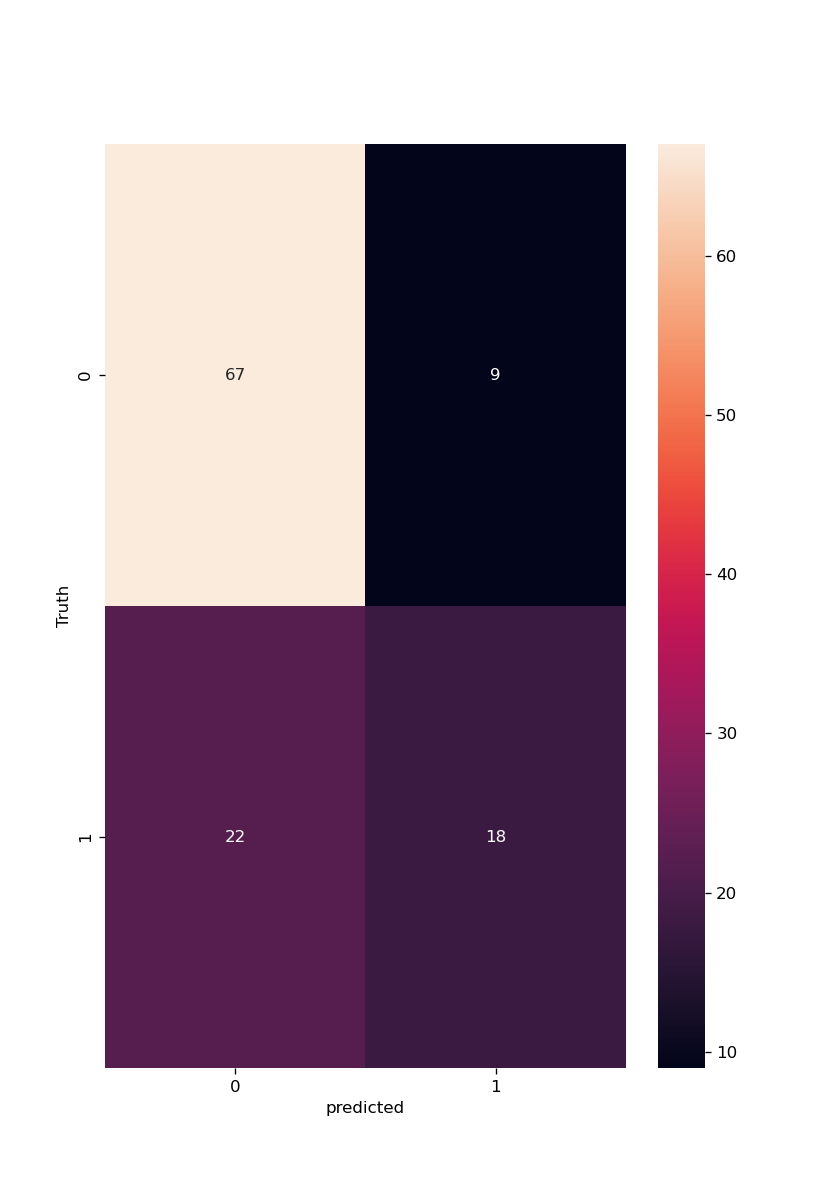

Text(58.222222222222214, 0.5, 'Truth')

In [30]:
%matplotlib notebook
plt.figure(figsize=(7,10))
sns.heatmap(cm ,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

<h4>predictive system<h4> 

In [32]:
input_data = ([6,148,72,35,0,33.6,0.627,50])
data = np.asarray(input_data)
data_reshaped= data.reshape(1,-1)
info =Data_scaler.transform(data_reshaped)
output  = model.predict(info)

In [33]:
output

array([1], dtype=int64)

<h4> saving the model </h4>

In [34]:
import joblib 

In [35]:
joblib.dump(model , 'diabetes prediction ')

['diabetes prediction ']